# Mount the drive

In [ ]:
%load_ext autoreload
%autoreload 2

from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import os
os.chdir("/content/gdrive/MyDrive/SiruiW")

## Fig.1 Images changes when $α$ varies

In [ ]:
# use beta = 0.99 to train model
!python train.py

training start!
/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[1/100] - ptime: 53.92, loss_d: -1.890, G1_mse: 0.0613, G2_mse: 0.1563
[2/100] - ptime: 52.14, loss_d: -1.637, G1_mse: 0.0606, G2_mse: 0.1352
[3/100] - ptime: 52.13, loss_d: -1.448, G1_mse: 0.0606, G2_mse: 0.1343
[4/100] - ptime: 52.29, loss_d: -1.403, G1_mse: 0.0608, G2_mse: 0.1217
[5/100] - ptime: 52.43, loss_d: -1.222, G1_mse: 0.0607, G2_mse: 0.1191
[6/100] - ptime: 52.67, loss_d: -1.149, G1_mse: 0.0607, G2_mse: 0.1190
[7/100] - ptime: 52.87, loss_d: -1.135, G1_mse: 0.0607, G2_mse: 0.1187
[8/100] - ptime: 52.72, loss_d: -1.137, G1_mse: 0.0607, G2_mse: 0.1188
[9/100] - ptime: 52.57, loss_d: -1.125, G1_mse: 0.0607, G2_mse: 0.1186
[10/100] - ptime: 52.56, loss_d: -1.103, G1_mse: 0.0607, G2_mse: 0.1190
[11/100] - ptime: 52.65, loss_d: -1.116, G1_mse: 0.0607, 

In [ ]:
# images changes when alpha varies
!python "/content/gdrive/MyDrive/SiruiW/test.py"

100% 561753746/561753746 [00:19<00:00, 29279839.44it/s]
Extracting EMNIST/raw/t10k-images-idx3-ubyte/EMNIST/raw/gzip.zip to EMNIST/raw/t10k-images-idx3-ubyte/EMNIST/raw
training start!
/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
mse without P constraint: 0.0695, mse with P=0: 0.1296, 0.1078, 0.0909, 0.0789, 0.0718


## Fig.2 The curve of MSE verse $β$

In [ ]:
# tune beta and plot the curve of MSE verse beta
from train_CY import train

# beta for MNIST
beta = [0.0, 0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.98, 0.99, 1.0]
# beta for Fashion-MNIST and EMNIST
#beta = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


# all the weights have been saved YangCao account. epoches = 30
train_mse = []
for b in beta:
  train_mse.append(train(b, 30))

training start!


/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


[1/30] - ptime: 55.14, loss_d: -5.815, G1_mse: 0.0626, G2_mse: 0.0653
[2/30] - ptime: 53.21, loss_d: -6.655, G1_mse: 0.0613, G2_mse: 0.0617
[3/30] - ptime: 53.71, loss_d: -6.919, G1_mse: 0.0611, G2_mse: 0.0613
[4/30] - ptime: 53.36, loss_d: -7.014, G1_mse: 0.0607, G2_mse: 0.0608
[5/30] - ptime: 52.84, loss_d: -7.106, G1_mse: 0.0606, G2_mse: 0.0607
[6/30] - ptime: 53.70, loss_d: -7.172, G1_mse: 0.0605, G2_mse: 0.0605
[7/30] - ptime: 52.90, loss_d: -7.236, G1_mse: 0.0606, G2_mse: 0.0606
[8/30] - ptime: 53.81, loss_d: -7.317, G1_mse: 0.0607, G2_mse: 0.0607
[9/30] - ptime: 53.26, loss_d: -7.386, G1_mse: 0.0607, G2_mse: 0.0607
[10/30] - ptime: 53.26, loss_d: -7.408, G1_mse: 0.0608, G2_mse: 0.0608
[11/30] - ptime: 54.66, loss_d: -7.440, G1_mse: 0.0608, G2_mse: 0.0608
[12/30] - ptime: 53.71, loss_d: -7.496, G1_mse: 0.0608, G2_mse: 0.0608
[13/30] - ptime: 54.59, loss_d: -7.527, G1_mse: 0.0608, G2_mse: 0.0608
[14/30] - ptime: 53.74, loss_d: -7.535, G1_mse: 0.0608, G2_mse: 0.0609
[15/30] - ptime

KeyboardInterrupt: ignored

In [ ]:
# read MSE of Gd and Gp from existing txts
beta1 = ['{0:.2f}'.format(float(i*0.1)) for i in range(11)]
l = []
for b in beta1:
  d = {}
  my_file = open(f"/content/gdrive/MyDrive/SiruiW/results/MNIST-{b}-G2_mse.txt", "r")
  G2_mse = my_file.read()
  G2_mse = G2_mse.split('\n')
  G2 = [float(mse) for mse in G2_mse if mse]
  my_file = open(f"/content/gdrive/MyDrive/SiruiW/results/MNIST-{b}-G1_mse.txt", "r")
  G1_mse = my_file.read()
  G1_mse = G1_mse.split('\n')
  G1 = [float(mse) for mse in G1_mse if mse]
  G1_double = [2 * float(mse) for mse in G1_mse if mse]
  d["G1_mse"] = G1
  d["G2_mse"] = G2
  d["2G1_mse"] = G1_double
  l.append(d)

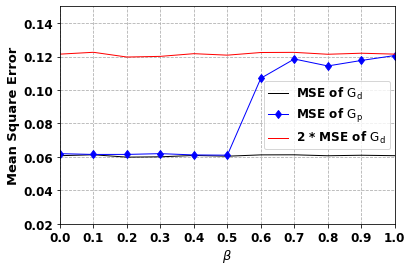

In [ ]:
# plot the curves
G1_mse = []
G1_2mse = []
G2_mse = []

for item in range(len(train_mes1)):
  G1_mse.append(train_mes1[item]['G1_mse'])
  G1_2mse.append(train_mes1[item]['2G1_mse'])
  G2_mse.append(train_mes1[item]['G2_mse'])

import matplotlib.pyplot as plt

x = beta
# G1_mean = [sum(G1_mse)/len(G1_mse) for _ in range(len(G1_mse))]
G1_mean = [sum(G1_mse[i])/len(G1_mse[i]) for i in range(len(G1_mse))]
G1_2_mean = [sum(G1_2mse[i])/len(G1_2mse[i]) for i in range(len(G1_2mse))]
G2_mean = [sum(G2_mse[i])/len(G2_mse[i]) for i in range(len(G2_mse))]

params = {
    'font.size': '10',
    'axes.titlesize': '10',
    'axes.labelsize': '10',
    'xtick.labelsize': '10',
    'ytick.labelsize': '10',
    'lines.linewidth': '1',
    'legend.fontsize': '10',
    'axes.labelpad': '3.0',
    'figure.figsize': '6, 4',
}
plt.rcParams.update(params)
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.unicode_minus'] = False 


plt.figure(figsize=(6, 4))
plt.grid(linestyle="--")  # 设置背景网格线为虚线
ax = plt.gca()
#ax.spines['top'].set_visible(False)  # 去掉上边框
#ax.spines['right'].set_visible(False)  # 去掉右边框

plt.plot(x, G1_mean, label=r'MSE of $\rm G_d$', color='black')
plt.plot(x, G2_mean, 'd-', color='blue', label=r'MSE of $\rm G_p$')
plt.plot(x, G1_2_mean, label=r'2 * MSE of $\rm G_d$', color='red')


plt.xlim(0,1)
plt.ylim(0.02, 0.15)
#plt.plot(n_36_20_0_2[:,0], n_36_20_0_2[:,1], marker='o', color="blue", label="E=20kV, kcut=0.2", linewidth=1.5)
#plt.plot(n_36_20_0_1[:,0], n_36_20_0_1[:,1], marker='o', color="green", label="E=20kV, kcut=0.1", linewidth=1.5)

#group_labels = ['Top 0-5%', 'Top 5-10%', 'Top 10-20%', 'Top 20-50%', 'Top 50-70%', ' Top 70-100%']  # x轴刻度的标识
plt.xticks(beta, fontsize=12, fontweight='bold')  # 默认字体大小为10
plt.yticks(fontsize=12, fontweight='bold')
#plt.title("kcut scaling (nprocs=36)", fontsize=12, fontweight='bold')
plt.xlabel(r"$\beta$", fontsize=13, fontweight='bold')
plt.ylabel("Mean Square Error", fontsize=13, fontweight='bold')
#plt.xlim(0.9, 6.1)
#plt.ylim(1.5, 16)

plt.legend()          #显示各曲线的图例
plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=12, fontweight='bold')






plt.savefig("/content/gdrive/MyDrive/Colab Notebooks/results", dpi=800)
plt.show()